In [6]:
# CELDA 1 - Instalar lo necesario
!pip install pandas matplotlib seaborn scikit-learn imbalanced-learn --quiet
print("✅ Todo instalado correctamente!")

✅ Todo instalado correctamente!



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# CELDA 2 - Cargar los datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo (asegúrate de que 'ai4i2020.csv' esté en la misma carpeta)
df = pd.read_csv('ai4i2020.csv')

# Ver qué tenemos
print("📊 Vistazo a los datos:")
print(df.head())

print("\n🎯 Cuántas fallas hay:")
print(f"Fallas: {df['Machine failure'].sum()} de {len(df)} máquinas")

📊 Vistazo a los datos:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0   

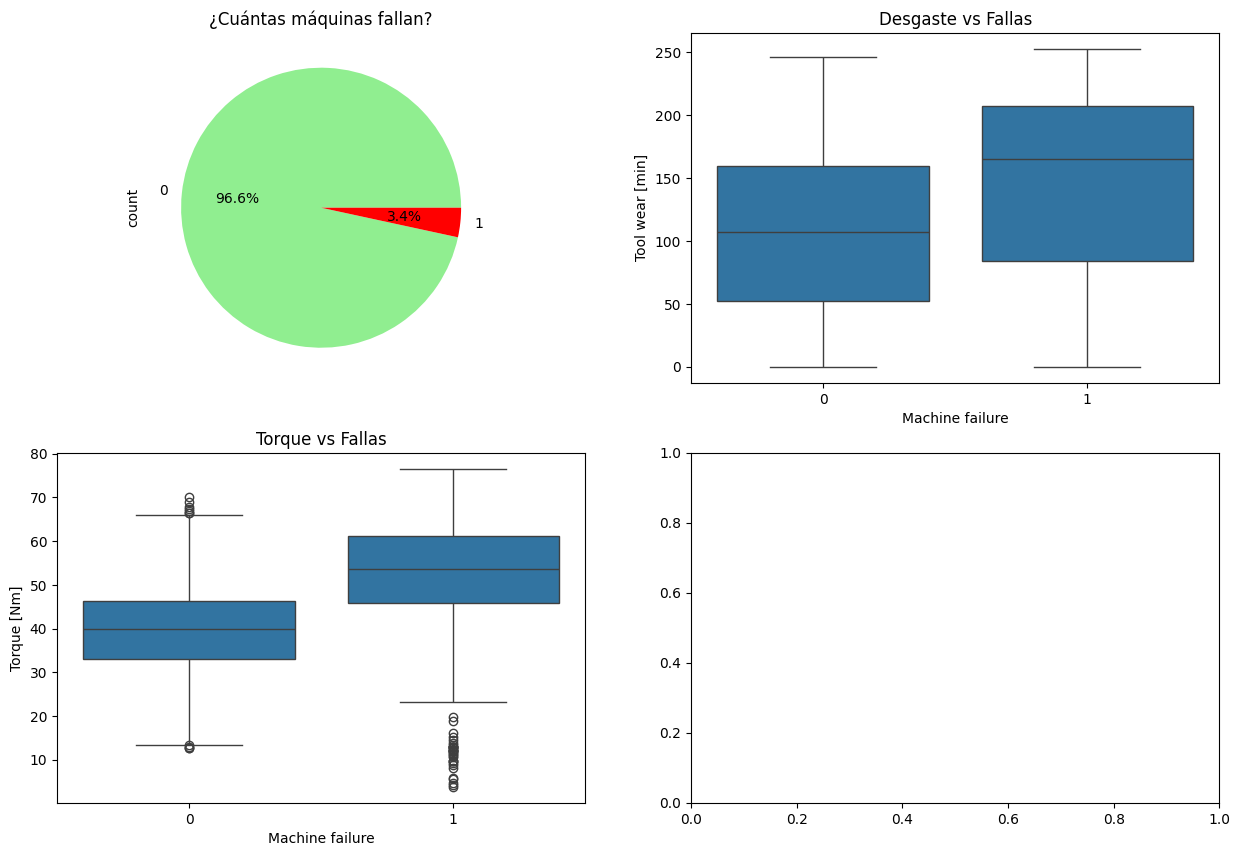

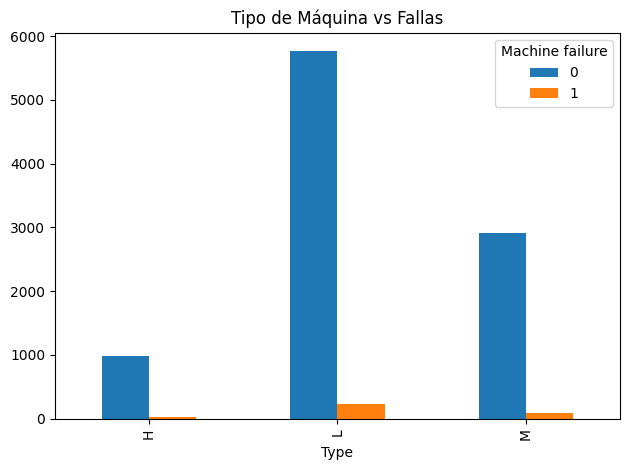

In [8]:
# CELDA 3 - Gráficos automáticos
plt.figure(figsize=(15, 10))

# Gráfico 1
plt.subplot(2, 2, 1)
df['Machine failure'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'red'])
plt.title('¿Cuántas máquinas fallan?')

# Gráfico 2  
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Machine failure', y='Tool wear [min]')
plt.title('Desgaste vs Fallas')

# Gráfico 3
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Machine failure', y='Torque [Nm]')
plt.title('Torque vs Fallas')

# Gráfico 4
plt.subplot(2, 2, 4)
pd.crosstab(df['Type'], df['Machine failure']).plot.bar()
plt.title('Tipo de Máquina vs Fallas')

plt.tight_layout()
plt.show()

# CELDA 4 - Modelo de predicción
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Preparar datos
df['Type_num'] = LabelEncoder().fit_transform(df['Type'])
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_num']

X = df[features]
y = df['Machine failure']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Ver resultados
y_pred = model.predict(X_test_scaled)
print("🎯 Resultados del modelo:")
print(f"Precisión: {model.score(X_test_scaled, y_test):.2%}")
print("\n📊 Detalles:")
print(classification_report(y_test, y_pred))

In [7]:
# CELDA 4 - Modelo de predicción
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Preparar datos
df['Type_num'] = LabelEncoder().fit_transform(df['Type'])
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_num']

X = df[features]
y = df['Machine failure']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Ver resultados
y_pred = model.predict(X_test_scaled)
print("🎯 Resultados del modelo:")
print(f"Precisión: {model.score(X_test_scaled, y_test):.2%}")
print("\n📊 Detalles:")
print(classification_report(y_test, y_pred))

🎯 Resultados del modelo:
Precisión: 98.63%

📊 Detalles:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.89      0.63      0.74        93

    accuracy                           0.99      3000
   macro avg       0.94      0.82      0.87      3000
weighted avg       0.99      0.99      0.99      3000



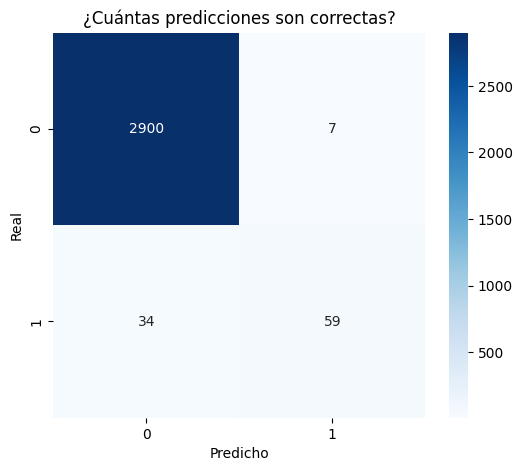

In [17]:
# CELDA 5 - Ver aciertos y errores
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('¿Cuántas predicciones son correctas?')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

📈 Variables más importantes para predecir fallas:
                  Variable  Importancia
3              Torque [Nm]     0.309921
2   Rotational speed [rpm]     0.231170
4          Tool wear [min]     0.155154
0      Air temperature [K]     0.139282
1  Process temperature [K]     0.138383
5                 Type_num     0.026090


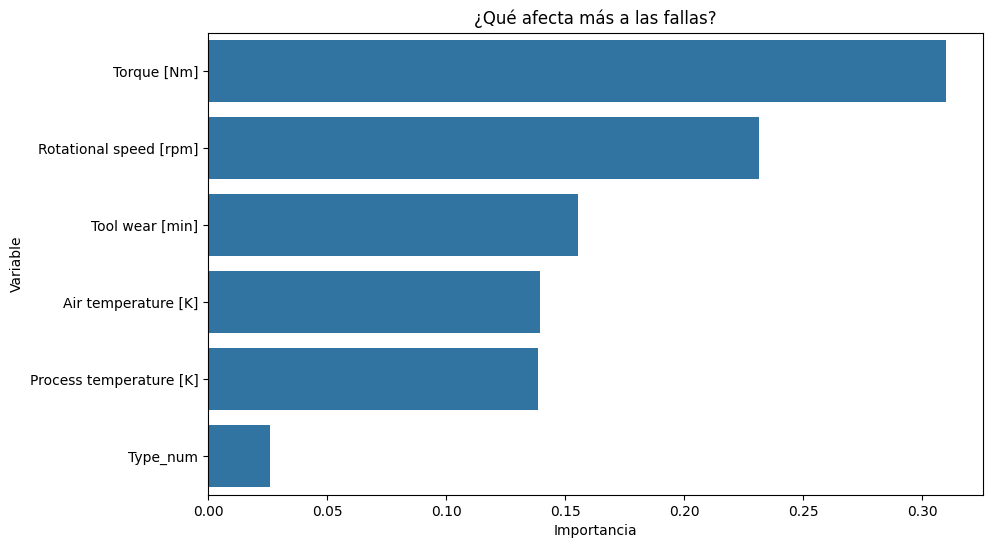

In [19]:
# CELDA 6 - Variables importantes
importance = pd.DataFrame({
    'Variable': features,
    'Importancia': model.feature_importances_
}).sort_values('Importancia', ascending=False)

print("📈 Variables más importantes para predecir fallas:")
print(importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='Importancia', y='Variable')
plt.title('¿Qué afecta más a las fallas?')
plt.show()

In [8]:
# CELDA 7 - Probemos predecir
def predecir_riesgo(tool_wear, torque, rotational_speed, tipo='M'):
    """Predice si una máquina va a fallar"""
    
    tipo_num = {'L': 0, 'M': 1, 'H': 2}[tipo]
    
    # Datos de ejemplo
    nueva_maquina = [[298, 308, rotational_speed, torque, tool_wear, tipo_num]]
    nueva_maquina_escalada = scaler.transform(nueva_maquina)
    
    probabilidad = model.predict_proba(nueva_maquina_escalada)[0, 1]
    
    if probabilidad > 0.7:
        riesgo = "🔴 ALTO RIESGO - Revisar urgentemente!"
    elif probabilidad > 0.3:
        riesgo = "🟡 RIESGO MODERADO - Monitorear"
    else:
        riesgo = "🟢 BAJO RIESGO - Todo OK"
    
    return f"Probabilidad de falla: {probabilidad:.1%} - {riesgo}"

# Probemos algunos casos
print("🧪 Probando predicciones:")
print("Caso 1 (normal):", predecir_riesgo(50, 35, 1600))
print("Caso 2 (peligroso):", predecir_riesgo(220, 65, 2800))
print("Caso 3 (intermedio):", predecir_riesgo(180, 55, 2200))

🧪 Probando predicciones:
Caso 1 (normal): Probabilidad de falla: 0.0% - 🟢 BAJO RIESGO - Todo OK
Caso 2 (peligroso): Probabilidad de falla: 82.0% - 🔴 ALTO RIESGO - Revisar urgentemente!
Caso 3 (intermedio): Probabilidad de falla: 6.0% - 🟢 BAJO RIESGO - Todo OK


c:\Users\danpa\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\danpa\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\danpa\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
